In [1]:
import math
import numpy as np
import codecs, json 
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import mixture
from scipy import linalg as la
from scipy import stats as st
from scipy.interpolate import griddata

![Pixel Formula](eq2.png)

In [18]:
path = 'train/warm/26.txt'
c_path = 'box/1.txt'

In [3]:
def read_tempdata(rn, path):
    arr = np.zeros([rn,8,8])
    with open(path) as f:
        for k in range(rn):
            for i in range(8):
                line = f.readline()
                t = [float(x) for x in line.split()]
                arr[k,i] = t
            line = f.readline()
    return arr

In [4]:
deconv = np.zeros([8,8,8,8])
s = 0.55
for i in range(8):
    for j in range(8):
        weight = 0
        for m in range(8):
            for n in range(8):
                deconv[i,j,m,n] = math.exp(-math.pow(np.linalg.norm(np.array([i,j]-np.array([m,n])))/s,2)*0.5)
                weight += deconv[i,j,m,n]
        deconv[i,j] /= weight

deconv = np.reshape(deconv,(64,64))

In [5]:
MINTEMP = 26.
MAXTEMP = 32.
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:128j, 0:7:128j]

In [6]:
def show_temp(arr):
    plt.figure(figsize=(6,5))
    bicubic = griddata(points, arr.reshape(-1), (grid_x, grid_y), method='cubic')
    pcm = plt.pcolormesh(np.flip(bicubic,0), cmap='jet', vmin = MINTEMP, vmax = MAXTEMP)
    plt.colorbar(pcm, fraction=0.175,pad=0.02)
    plt.axis('off')
    plt.show()
    return bicubic

In [20]:
c_arr = read_tempdata(36000,c_path)

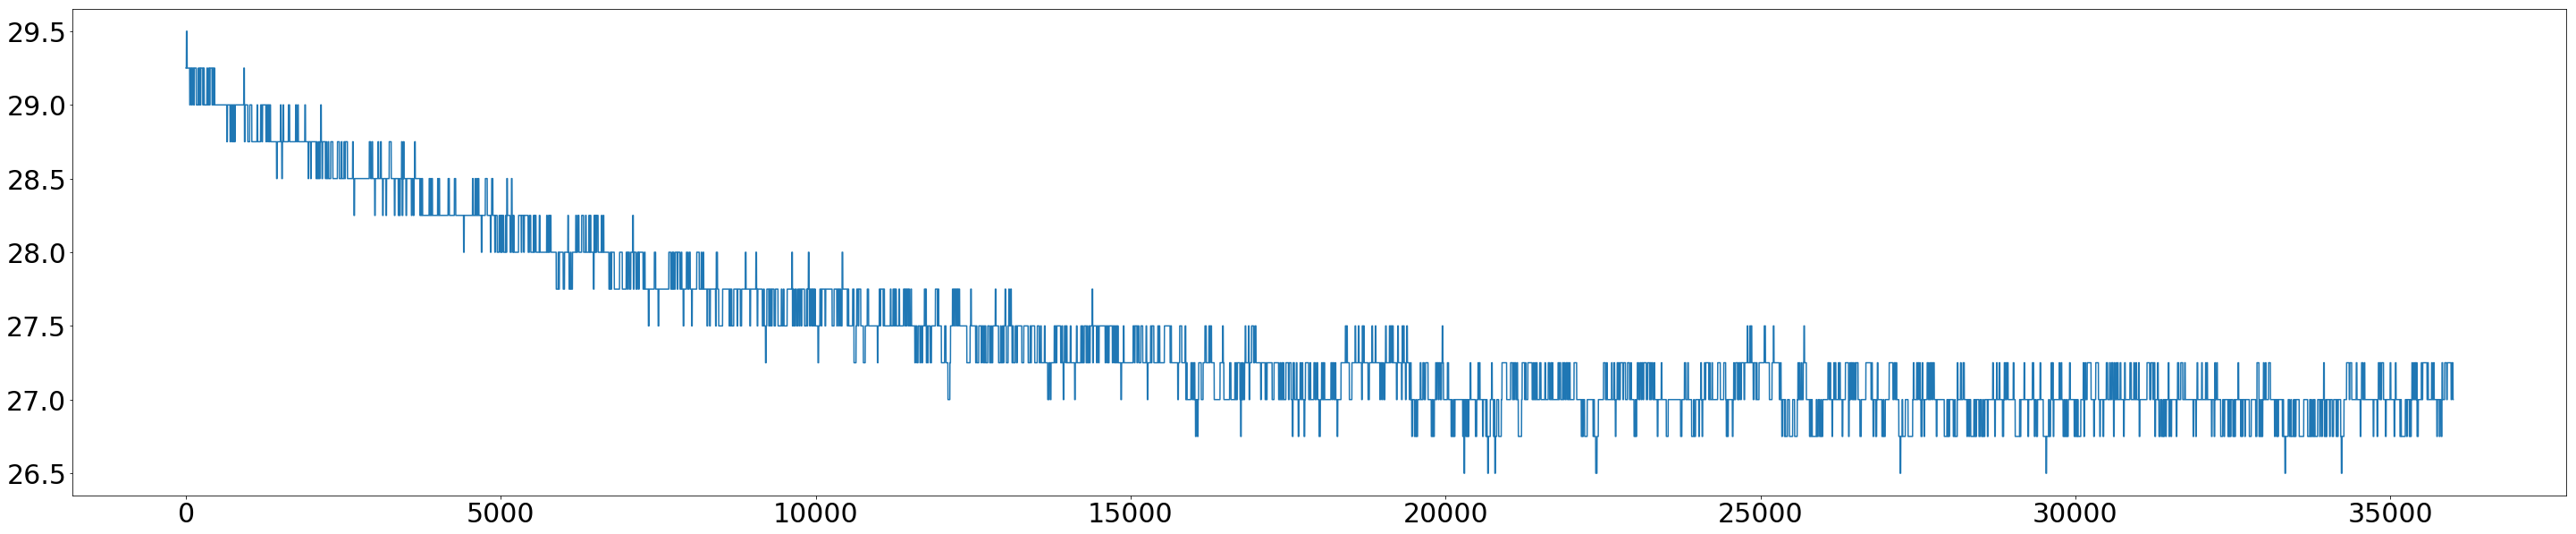

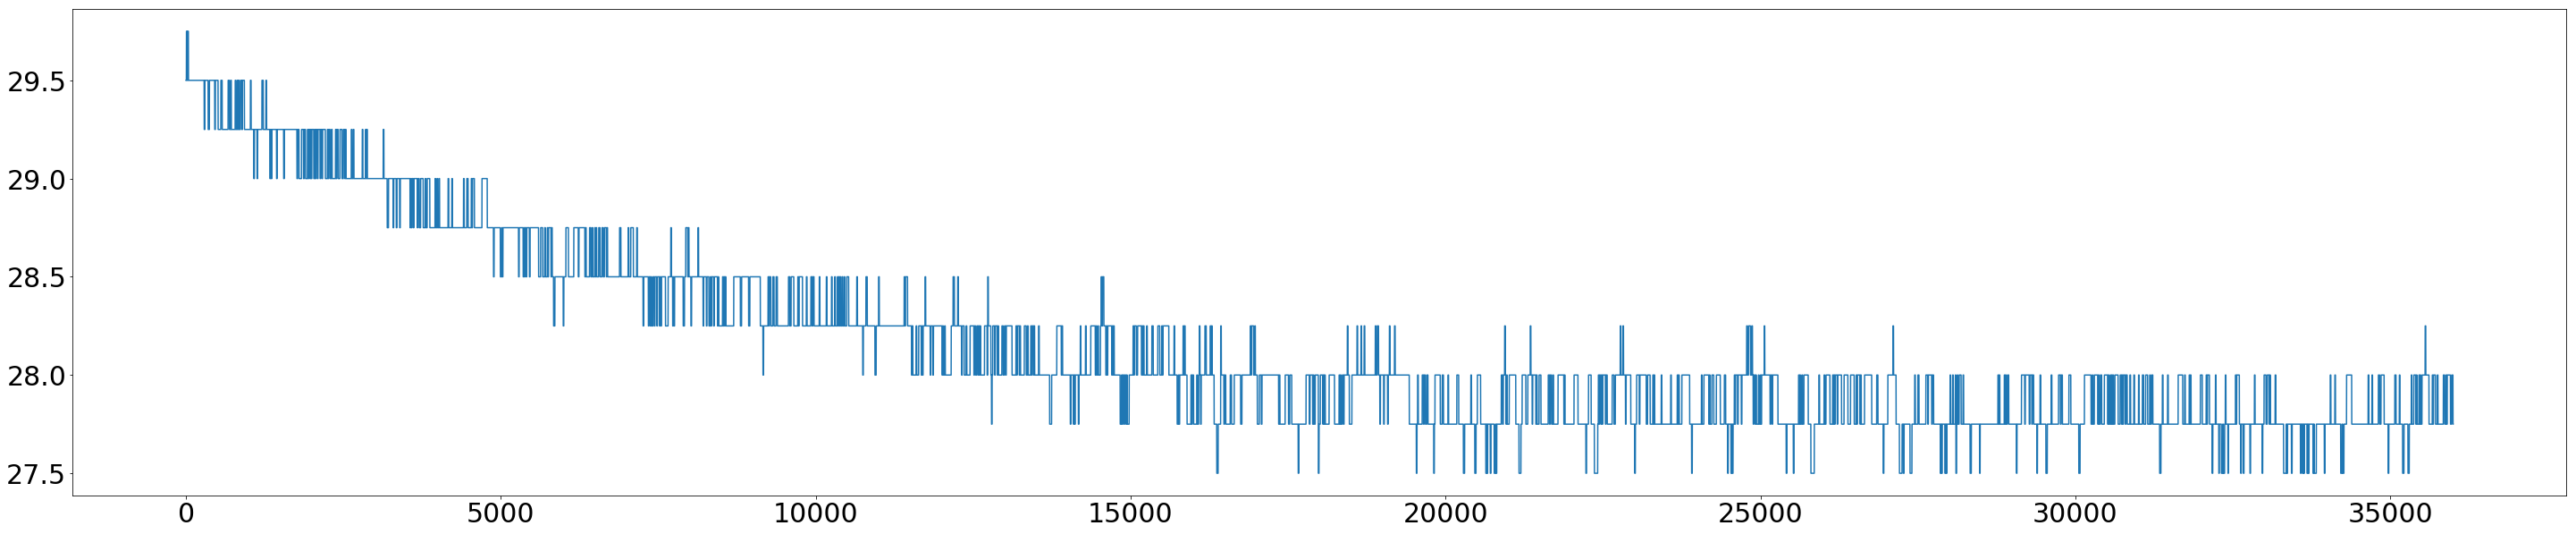

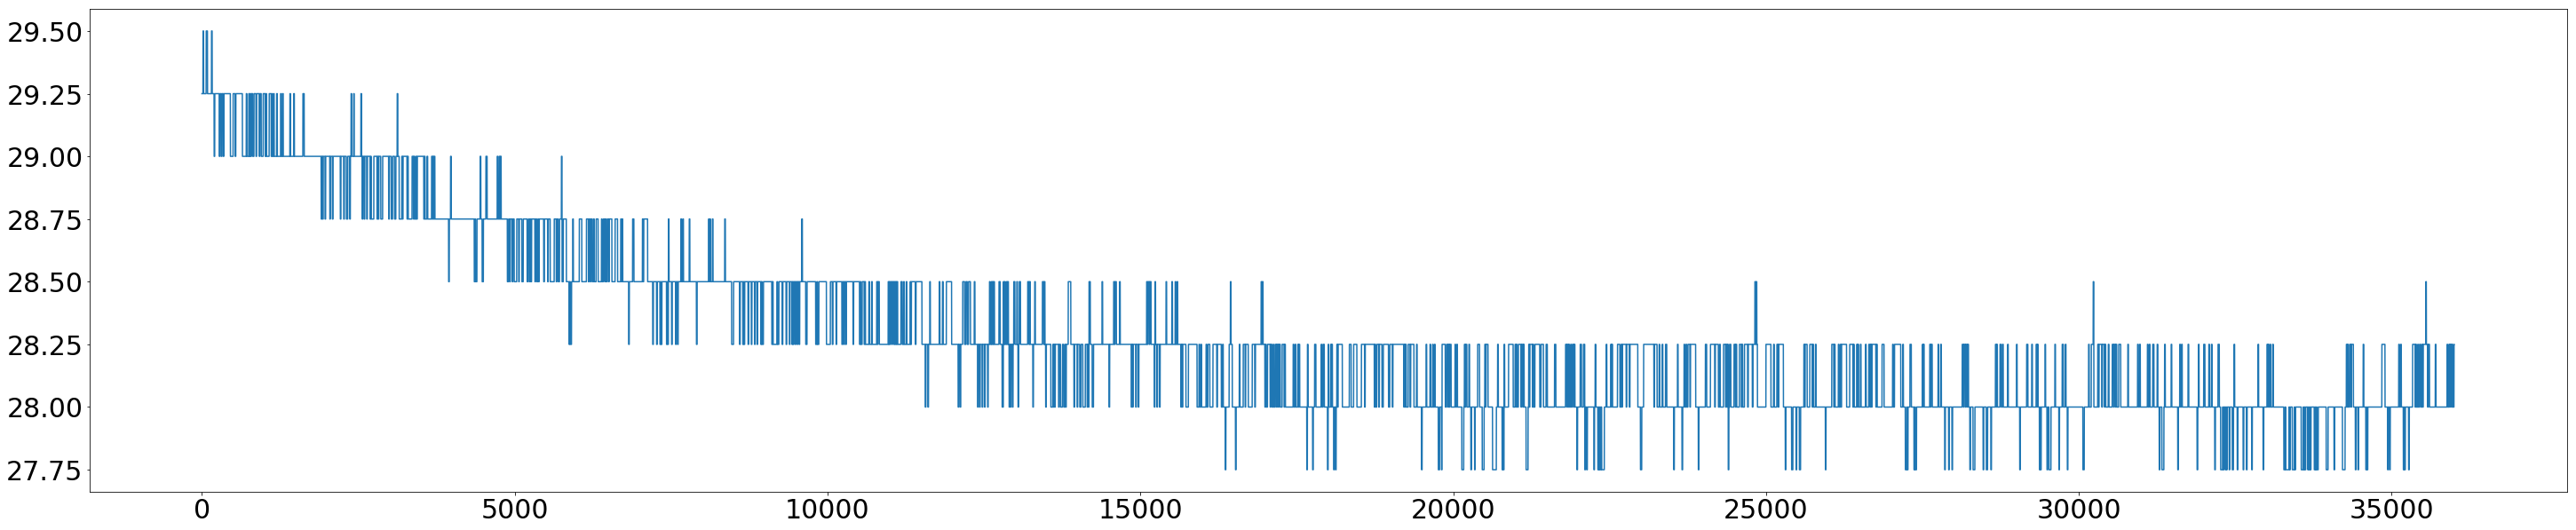

In [21]:
for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(c_arr[:,i,i])

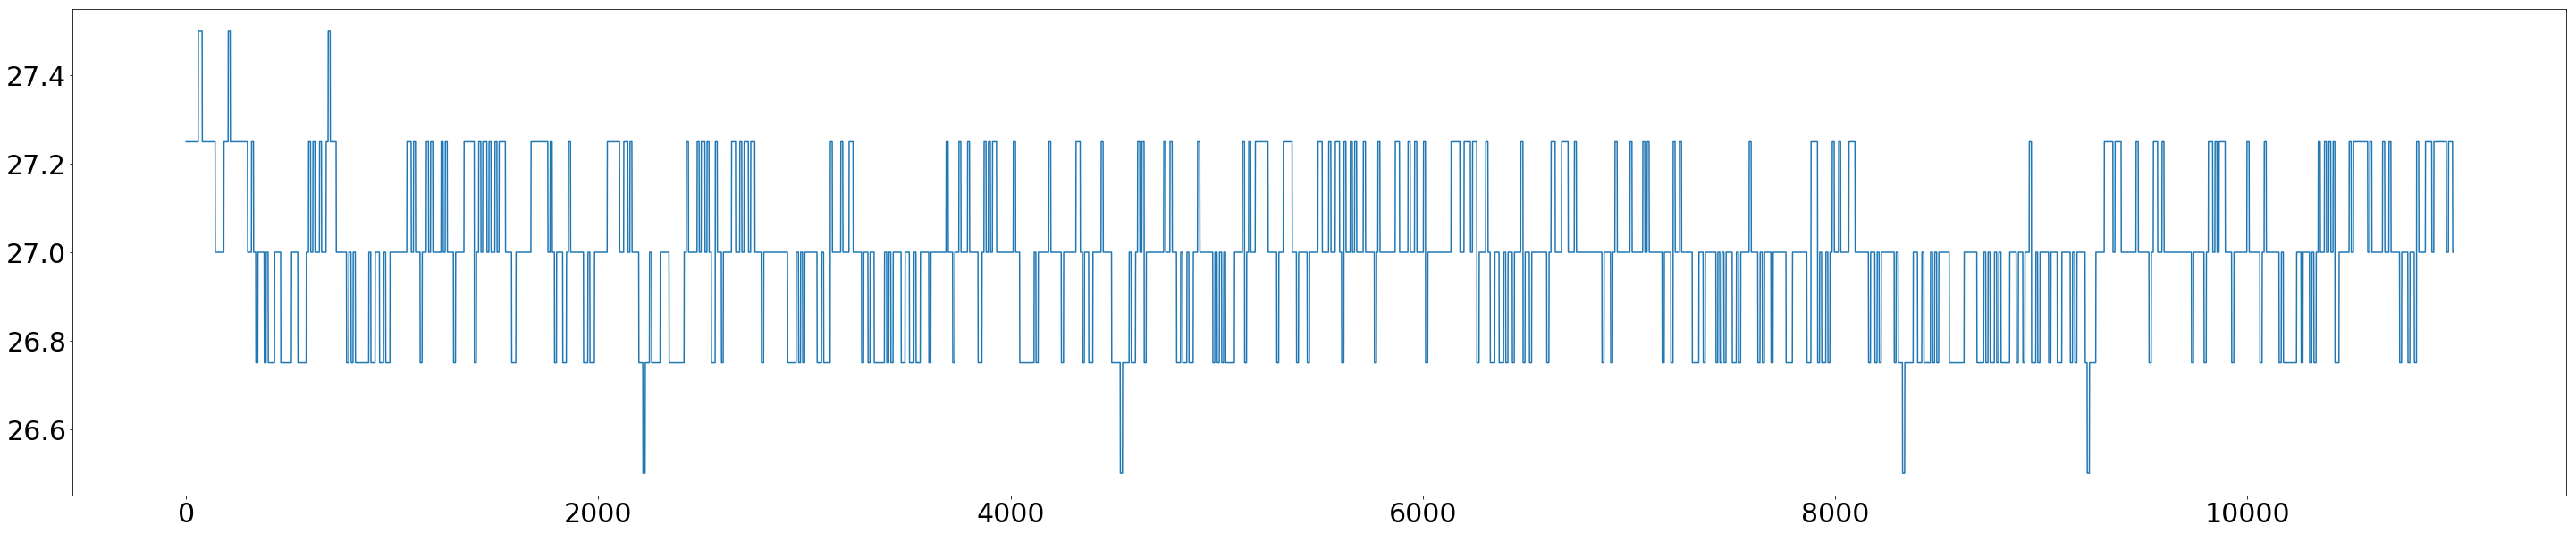

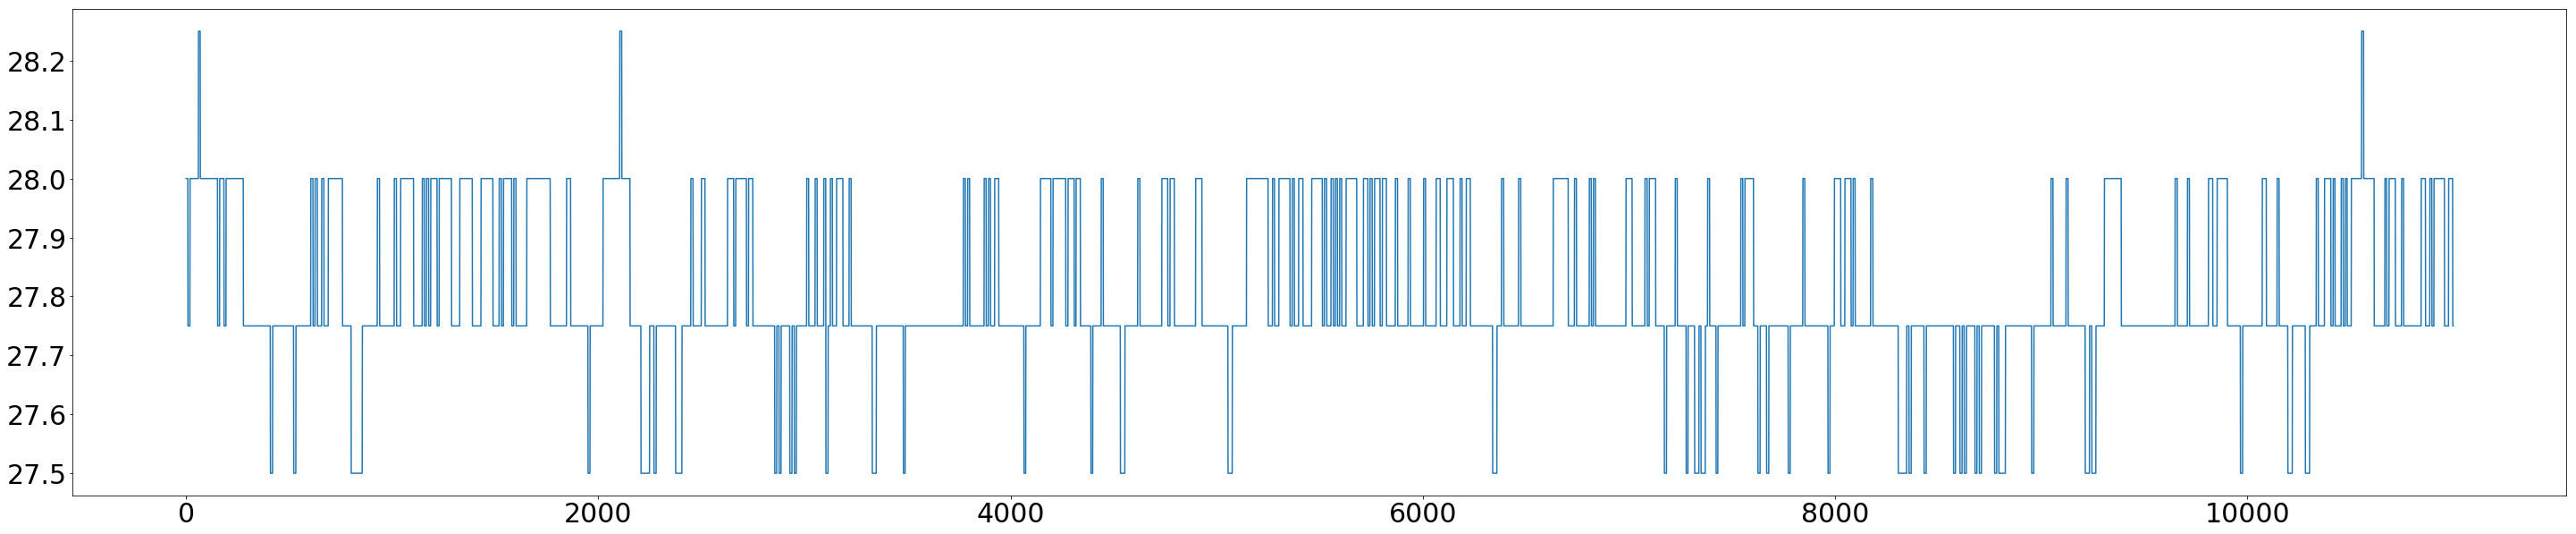

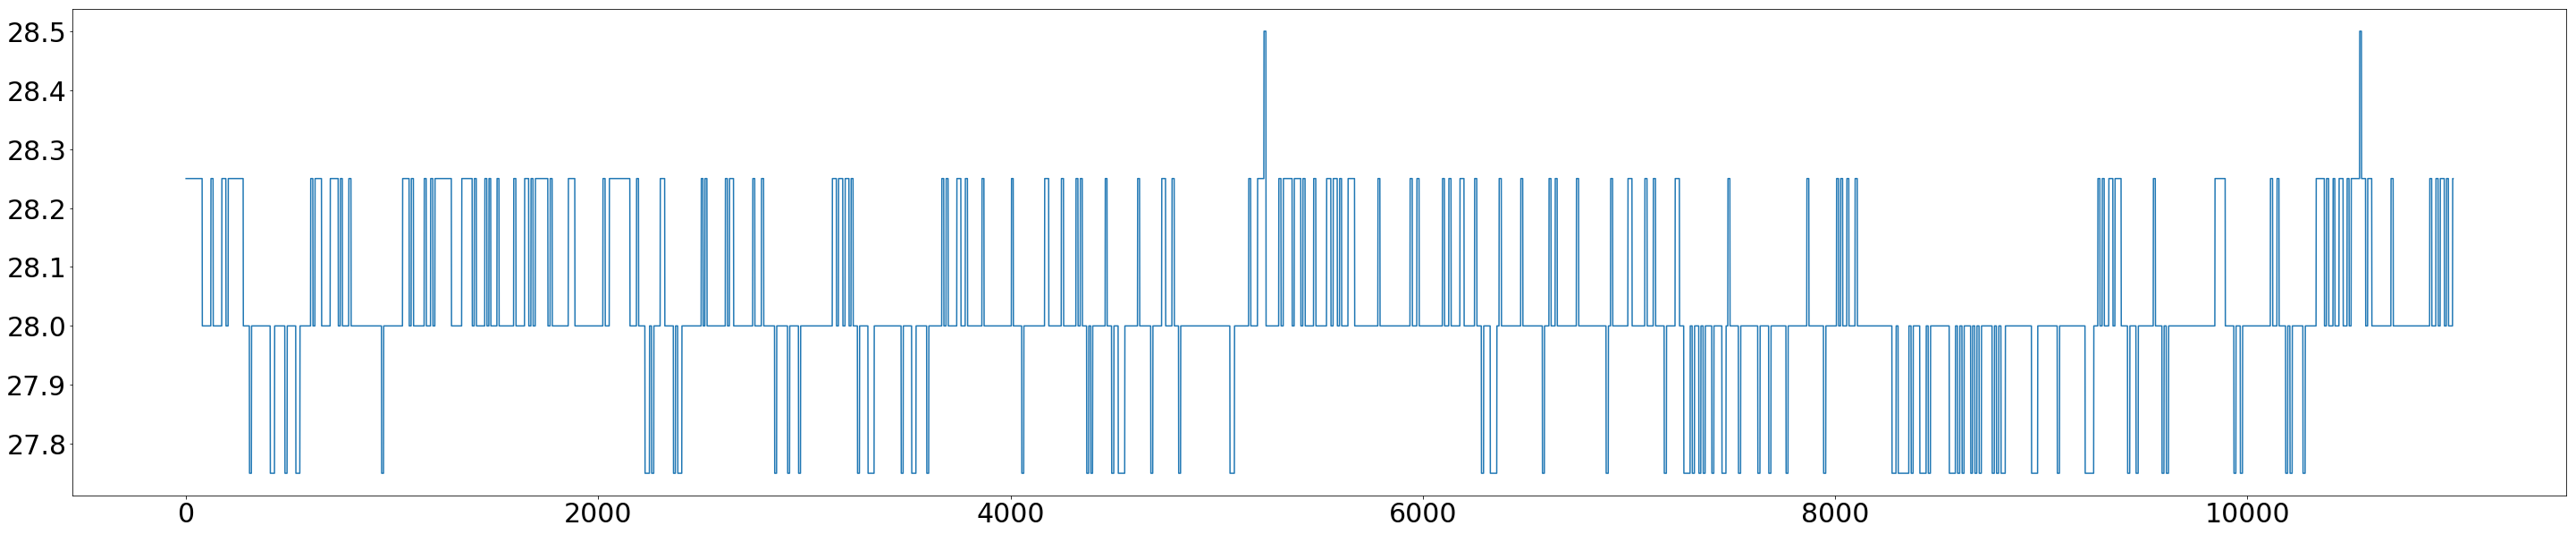

In [23]:
for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(c_arr[25000:,i,i])

In [24]:
c_timemean = np.mean(c_arr, axis = 0)
c_maxnoise = np.percentile(c_arr[25000:], 99, axis = 0) - c_timemean

c_maxnoise.round(2)

array([[-0.19, -0.13, -0.04,  0.03, -0.12, -0.04, -0.02, -0.07],
       [-0.12, -0.09, -0.03,  0.07, -0.01,  0.08,  0.01, -0.14],
       [-0.17, -0.17, -0.18, -0.15, -0.12, -0.1 ,  0.06,  0.08],
       [-0.12, -0.03, -0.02, -0.15, -0.03, -0.11,  0.04, -0.03],
       [-0.22, -0.14, -0.17, -0.03, -0.01, -0.02,  0.12,  0.1 ],
       [-0.14, -0.05, -0.09, -0.09,  0.07, -0.1 ,  0.03, -0.1 ],
       [-0.04, -0.01, -0.11, -0.09,  0.02, -0.07, -0.03,  0.1 ],
       [ 0.06, -0.16,  0.02, -0.11, -0.07,  0.13, -0.03,  0.13]])

In [25]:
c_mean = np.mean(c_arr)
c_error = c_timemean-c_mean

c_error.round(2)

array([[-0.61,  0.08, -0.01,  0.17,  0.07,  0.24,  0.47,  0.27],
       [-0.43,  0.04, -0.02,  0.14, -0.04,  0.13,  0.19,  0.09],
       [-0.38,  0.12, -0.12,  0.1 ,  0.07,  0.06,  0.14,  0.37],
       [-0.18, -0.02, -0.03,  0.1 , -0.02,  0.06,  0.16, -0.02],
       [-0.33,  0.09, -0.13, -0.02,  0.21, -0.03,  0.08,  0.11],
       [-0.41, -0.25, -0.21,  0.04,  0.13,  0.3 , -0.08,  0.3 ],
       [-0.51, -0.03,  0.06,  0.04,  0.18,  0.27,  0.23,  0.1 ],
       [-0.61, -0.39, -0.07,  0.06,  0.03, -0.18, -0.02, -0.18]])

In [17]:
c_mean = np.mean(c_arr)
c_error = c_timemean-c_mean

c_error.round(2)

array([[-0.91, -0.16, -0.23,  0.  , -0.09,  0.1 ,  0.31,  0.08],
       [-0.71, -0.19, -0.24, -0.05, -0.18, -0.02,  0.05, -0.09],
       [-0.66, -0.13, -0.36, -0.1 , -0.1 , -0.12, -0.03,  0.2 ],
       [-0.44, -0.28, -0.28, -0.11, -0.21, -0.13, -0.03, -0.21],
       [-0.3 , -0.09, -0.38, -0.27, -0.02, -0.29, -0.16, -0.11],
       [ 0.1 ,  0.28,  0.15,  0.2 ,  0.09,  0.17, -0.22,  0.21],
       [-0.28,  0.26,  0.42,  0.47,  0.62,  0.71,  0.66,  0.48],
       [-0.37,  0.06,  0.45,  0.6 ,  0.58,  0.39,  0.56,  0.36]])

In [11]:
c_mean = np.mean(c_arr)
c_error = c_timemean-c_mean

c_error.round(2)

array([[-0.15,  0.47,  0.34,  0.49,  0.32,  0.51,  0.7 ,  0.45],
       [-0.02,  0.44,  0.29,  0.45,  0.24,  0.34,  0.38,  0.14],
       [ 0.01,  0.44,  0.1 ,  0.35,  0.27,  0.18,  0.2 ,  0.29],
       [ 0.16,  0.23,  0.11,  0.31,  0.1 ,  0.07, -0.01, -0.39],
       [ 0.07,  0.23, -0.43,  0.05,  0.17, -0.25, -0.03, -0.51],
       [-0.03, -0.14, -0.7 ,  0.18,  0.03,  0.08, -0.18, -0.28],
       [-0.29, -0.  , -0.3 ,  0.06,  0.21,  0.22, -0.02, -0.47],
       [-0.69, -0.74, -0.57, -0.49, -0.56, -0.72, -0.77, -0.95]])

In [12]:
arr1 = read_tempdata(100,path)

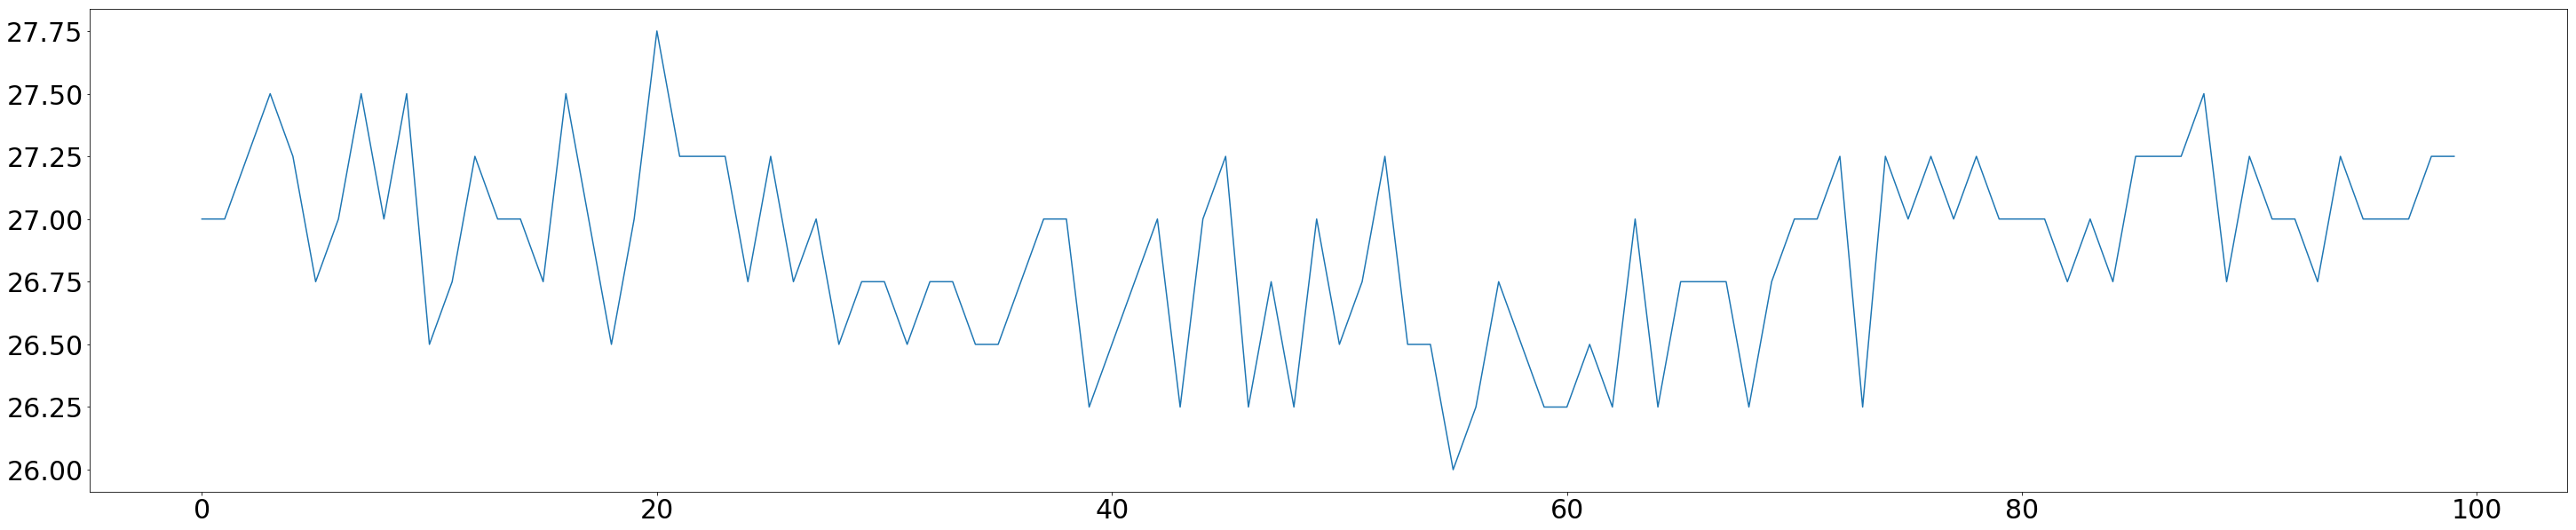

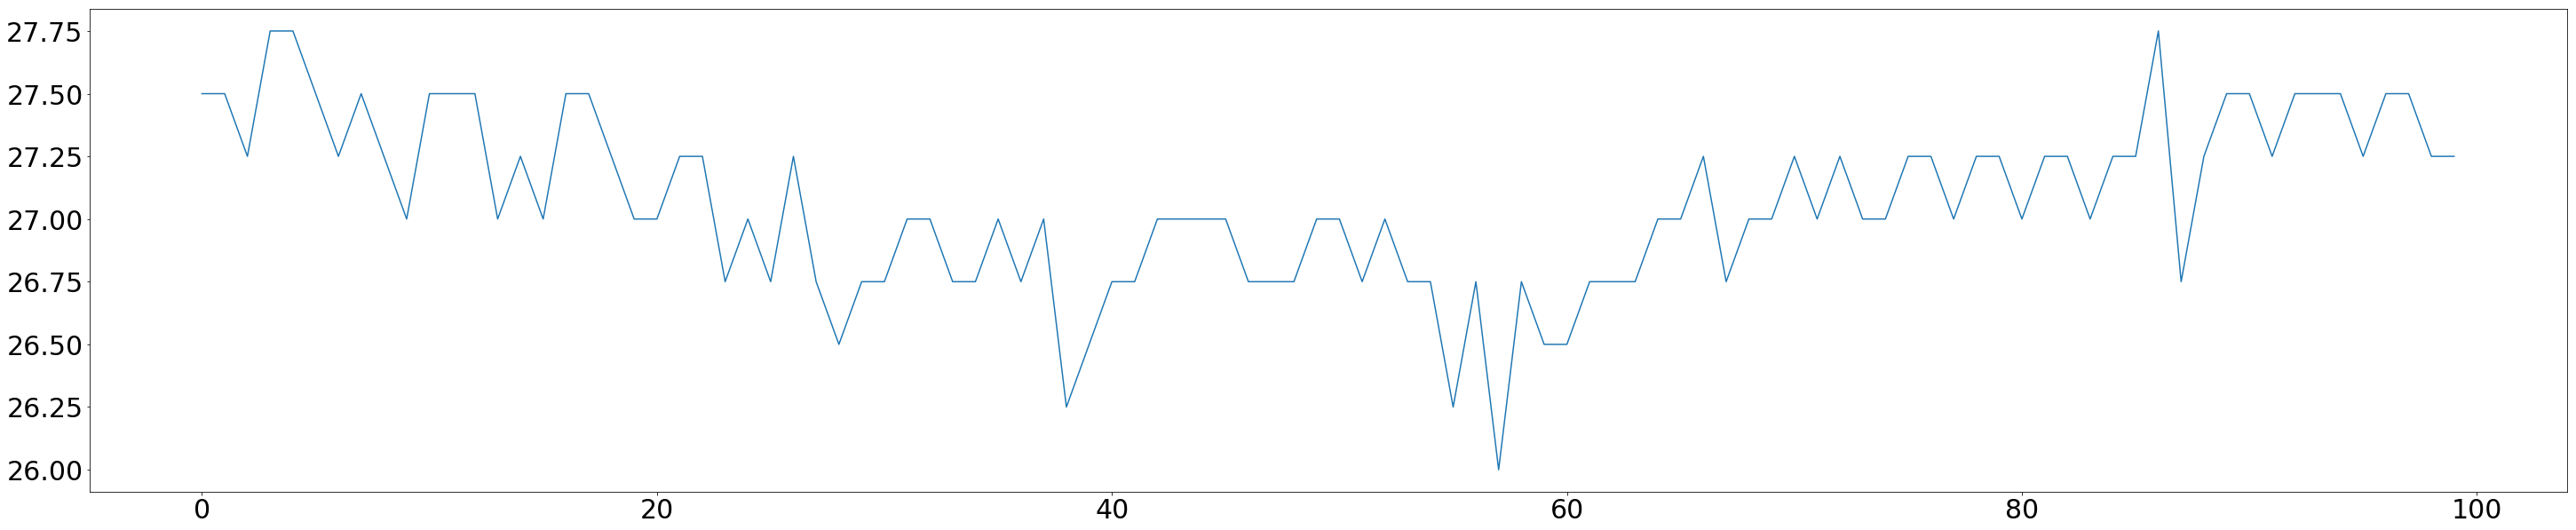

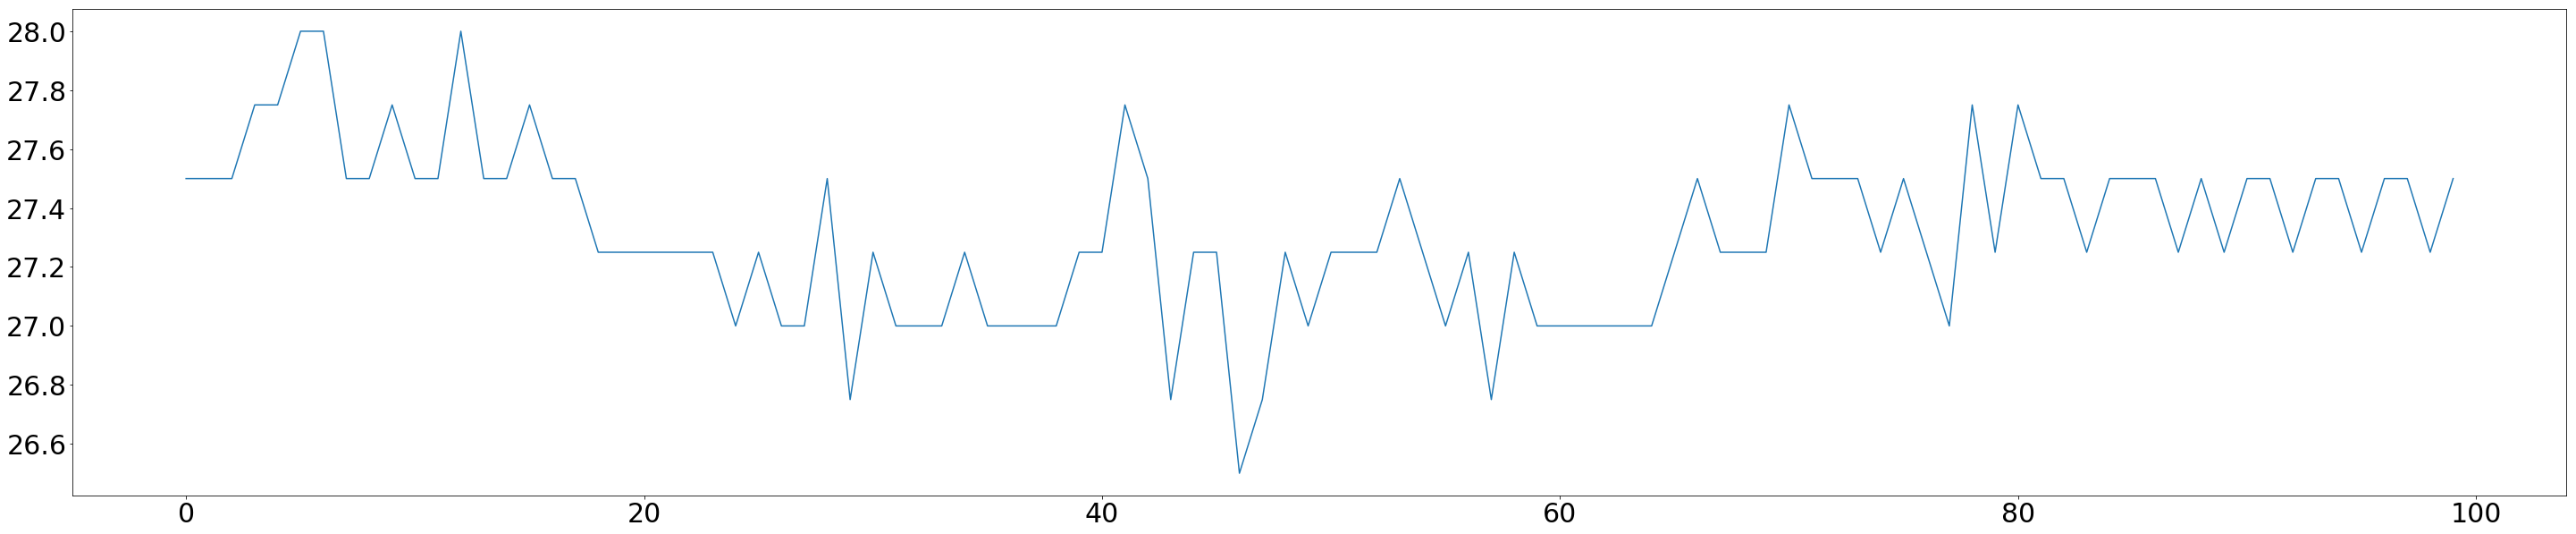

In [13]:
for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(arr1[:,i,i])

In [14]:
arr1_nerr = arr1 - c_error

np.mean(arr1_nerr, axis = 0).round(2)

array([[27.78, 27.68, 27.77, 27.72, 27.62, 27.66, 27.67, 27.7 ],
       [27.52, 27.44, 27.4 , 27.38, 27.39, 27.34, 27.27, 27.26],
       [27.43, 27.42, 27.6 , 27.3 , 27.16, 27.15, 27.12, 27.09],
       [27.44, 27.5 , 27.59, 27.17, 26.92, 26.96, 26.94, 26.9 ],
       [27.05, 27.33, 27.42, 27.1 , 26.84, 27.02, 27.15, 27.55],
       [26.53, 26.51, 26.69, 26.8 , 27.01, 27.28, 27.26, 27.45],
       [26.73, 26.64, 26.58, 26.5 , 26.59, 26.52, 26.65, 26.88],
       [26.53, 26.45, 26.31, 26.25, 26.33, 26.25, 26.36, 26.72]])

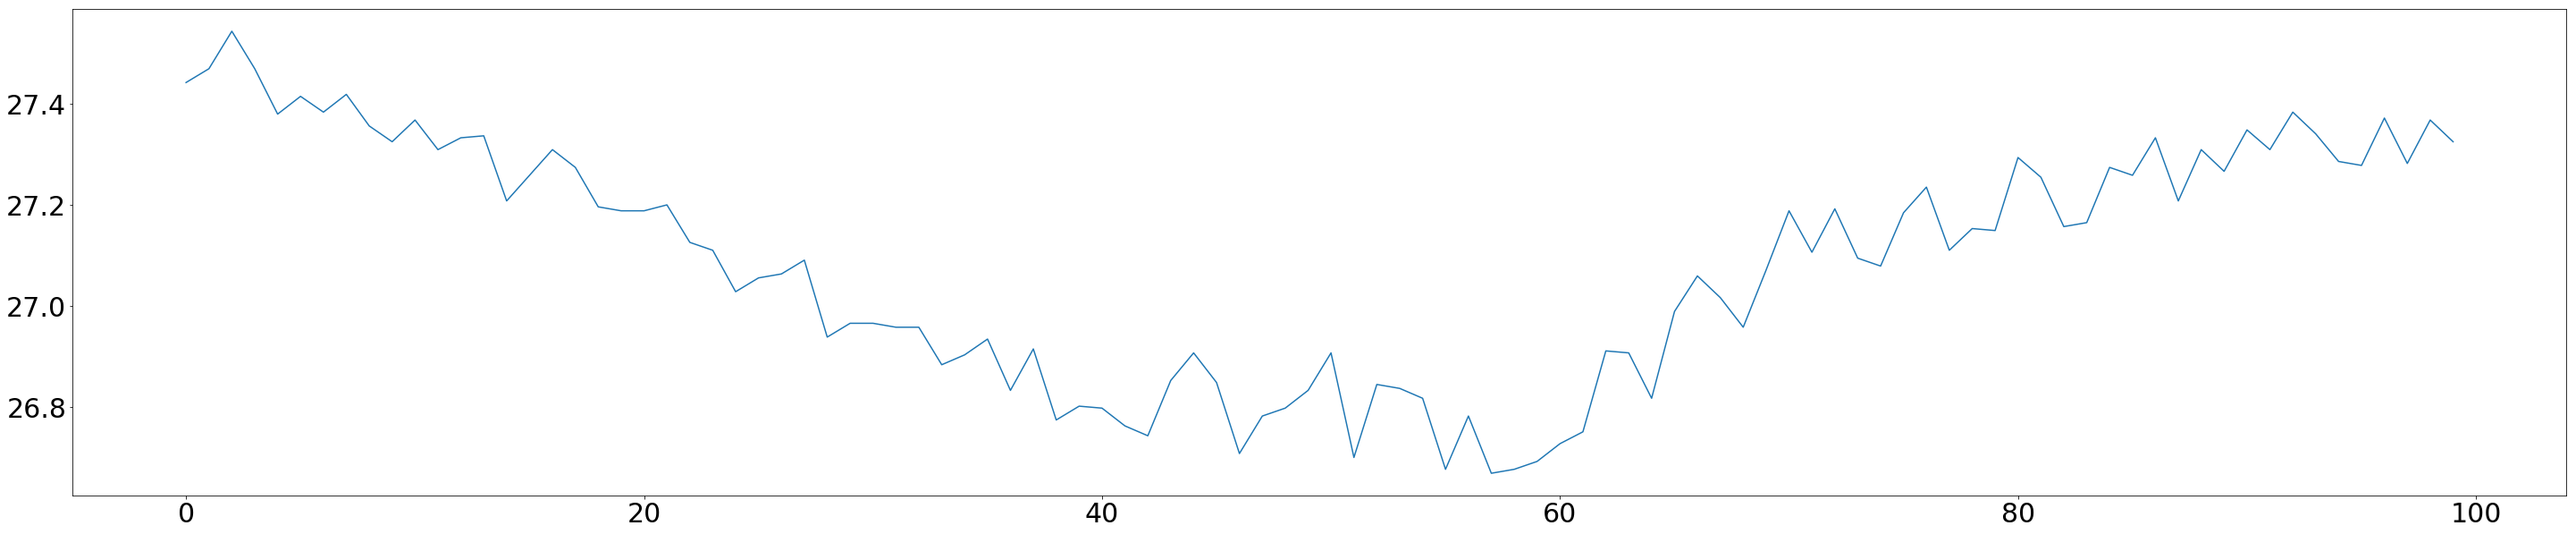

In [15]:
space_mean = np.mean(arr1_nerr, axis = (1,2))

plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(space_mean)

In [16]:
time_max = np.amax(arr1_nerr, axis = 0)
mean = np.mean(time_max - c_maxnoise)

mean

27.55510999891493

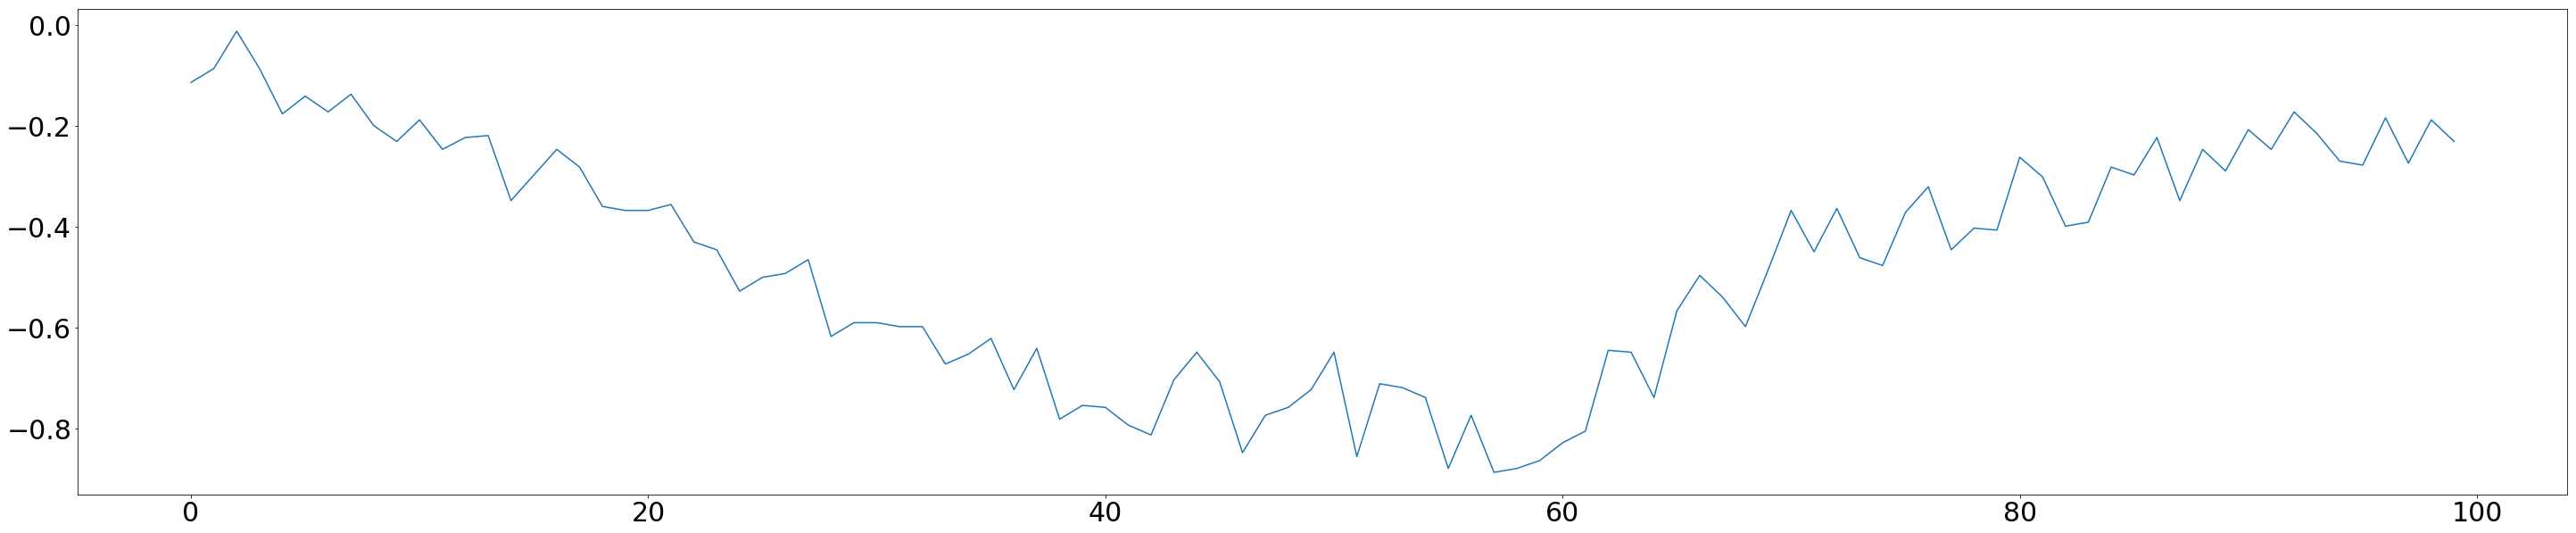

In [17]:
windnoise = space_mean- mean

plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(windnoise)

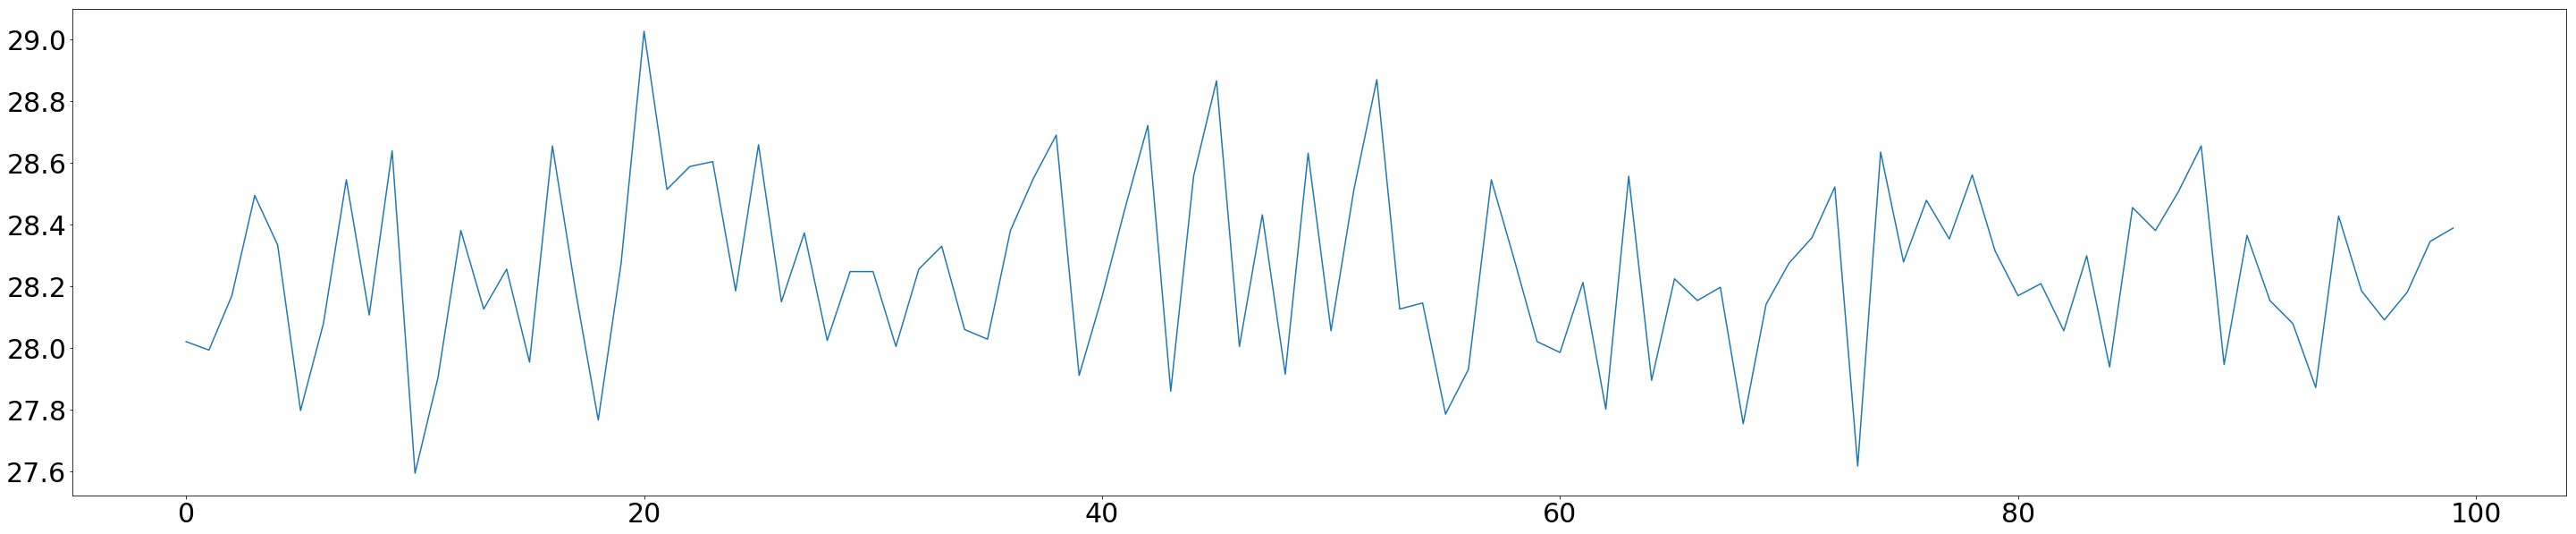

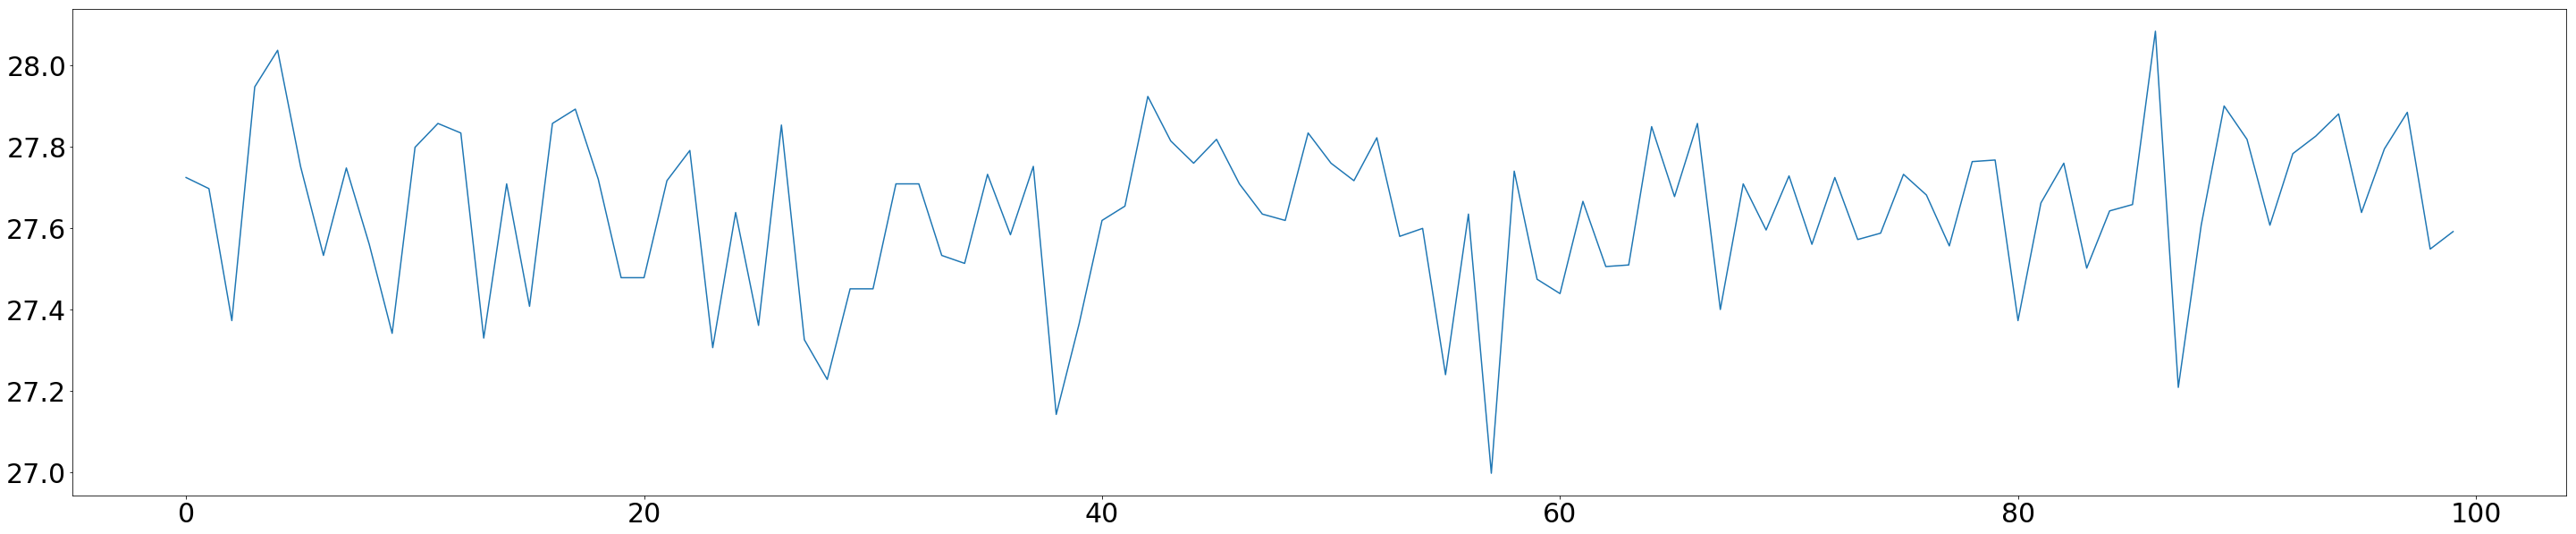

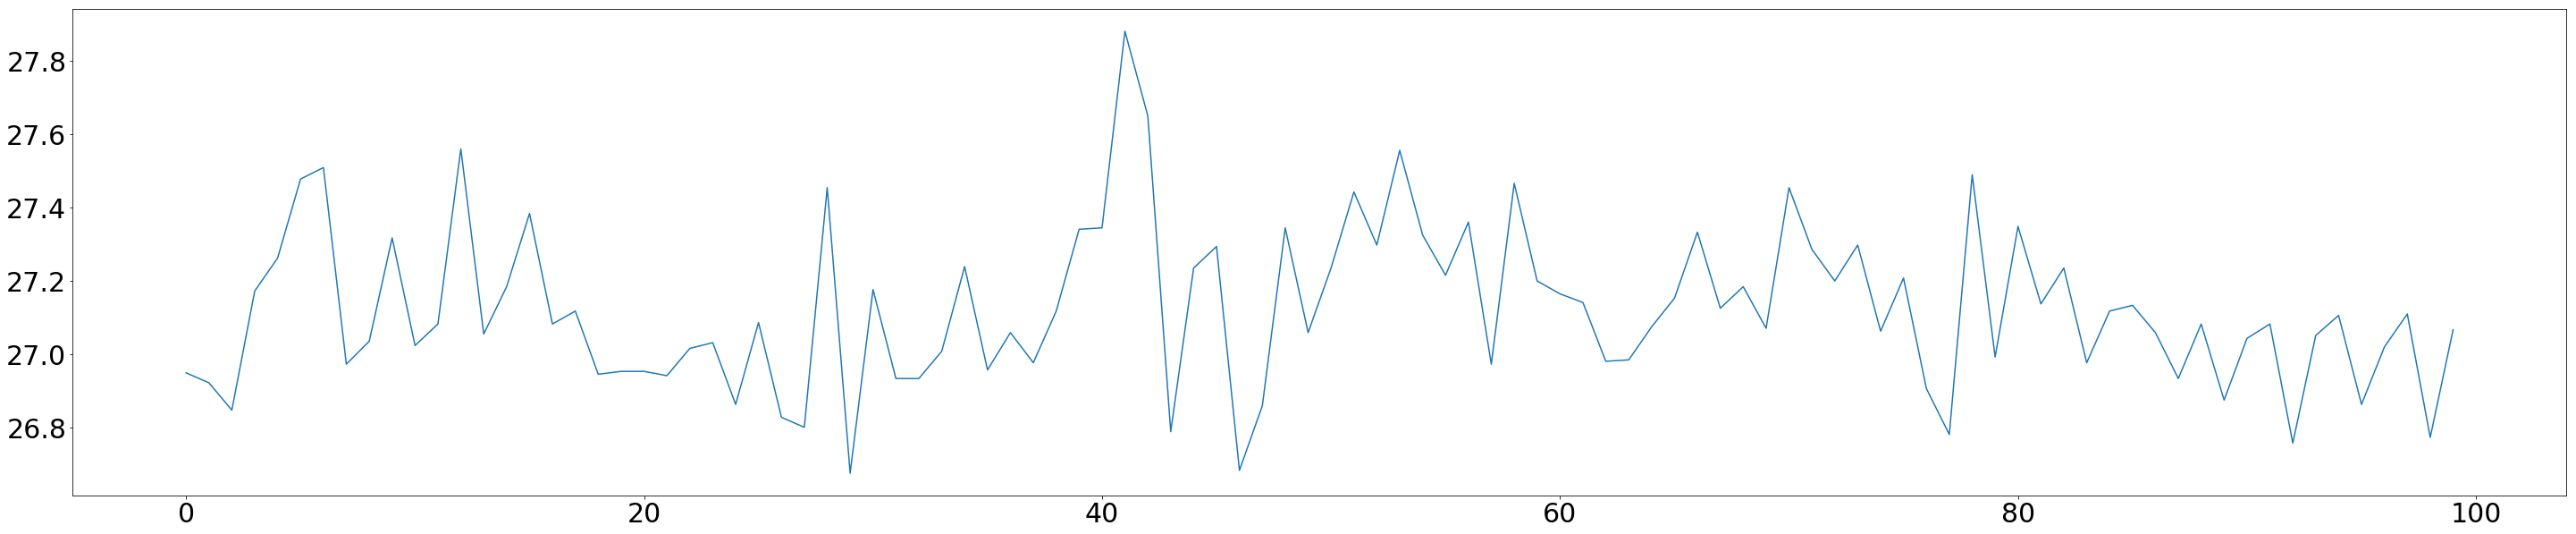

In [18]:
arr1_nwind = arr1_nerr.transpose(1,2,0) - windnoise
arr1_nwind = arr1_nwind.transpose(2,0,1)
for i in range(0,8,3):
    
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(arr1_nwind[:,i,i])

In [19]:
arr1_2 = time_max - c_maxnoise

arr1_2.round(2)

array([[28.23, 28.23, 28.23, 28.23, 27.98, 27.98, 27.98, 28.23],
       [27.98, 27.73, 27.98, 27.73, 27.73, 27.73, 27.73, 27.73],
       [27.98, 27.98, 28.23, 27.73, 27.73, 27.73, 27.73, 27.73],
       [27.98, 27.98, 27.98, 27.73, 27.73, 27.48, 27.48, 27.48],
       [27.48, 27.98, 27.98, 27.73, 27.48, 27.48, 27.73, 27.98],
       [26.73, 26.98, 26.98, 27.23, 27.48, 27.48, 27.73, 27.73],
       [27.48, 26.98, 26.98, 26.73, 26.98, 26.98, 26.98, 27.23],
       [26.98, 26.73, 26.98, 26.73, 26.73, 26.48, 26.73, 27.23]])

In [20]:
time_mean = np.mean(arr1_nwind,axis = 0)

time_mean.round(2)

array([[28.25, 28.15, 28.23, 28.19, 28.09, 28.13, 28.14, 28.17],
       [27.98, 27.91, 27.87, 27.85, 27.85, 27.81, 27.74, 27.73],
       [27.9 , 27.89, 28.07, 27.77, 27.63, 27.62, 27.59, 27.56],
       [27.91, 27.97, 28.06, 27.64, 27.39, 27.42, 27.4 , 27.37],
       [27.52, 27.8 , 27.89, 27.57, 27.31, 27.49, 27.62, 28.02],
       [27.  , 26.97, 27.15, 27.27, 27.48, 27.75, 27.72, 27.92],
       [27.2 , 27.11, 27.04, 26.96, 27.06, 26.99, 27.12, 27.35],
       [27.  , 26.91, 26.78, 26.72, 26.79, 26.72, 26.83, 27.19]])

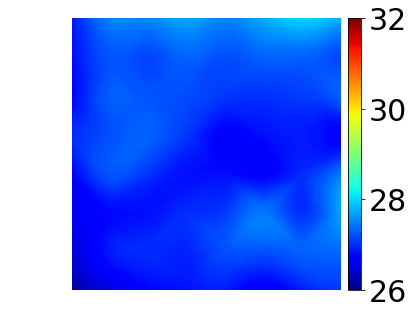

In [21]:
bicubic = show_temp(np.mean(arr1,axis = 0))

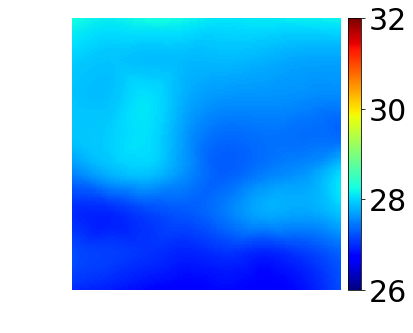

In [22]:
bicubic = show_temp(time_mean)

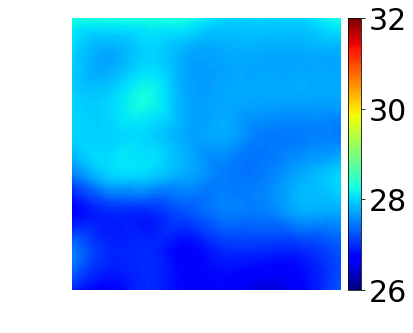

In [23]:
bicubic = show_temp(arr1_2)

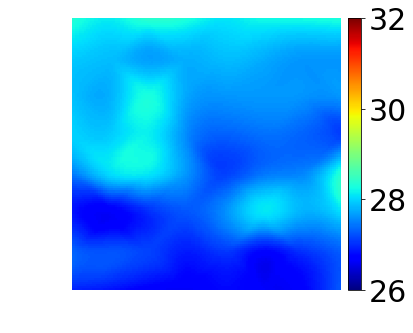

In [24]:
samp = np.reshape(time_mean,(64))
ans = np.linalg.solve(deconv,samp)
bicubic  = show_temp(ans)

In [25]:
np.amax(bicubic)

28.420301342126947

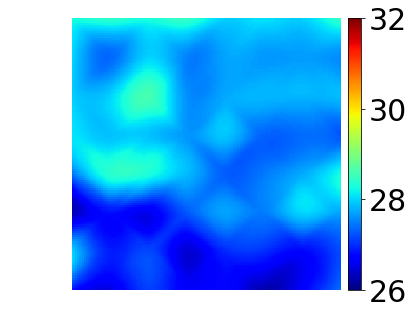

In [26]:
samp = np.reshape(arr1_2,(64))
ans = np.linalg.solve(deconv,samp)
bicubic  = show_temp(ans)

In [27]:
np.amax(bicubic)

28.60999198972806